<a href="https://colab.research.google.com/github/Viiiin94/ondevice_ai_python/blob/main/colab/AI_exam07_classfication_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


12479
1


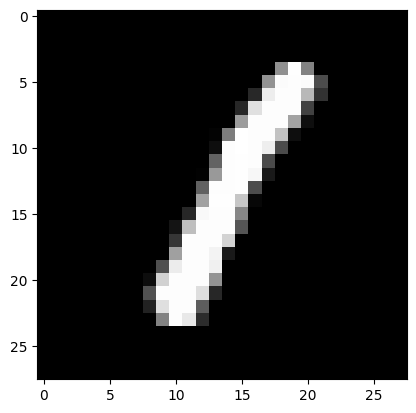

In [ ]:
# 0 ~ 59999의 랜덤 인덱스
my_sample = np.random.randint(0, X_train.shape[0])
print(my_sample)
print(Y_train[my_sample])
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
# print(X_train[my_sample])

In [ ]:
# 위의 숫자를 10개의 인덱스와 같으면 해당 list의 인덱스가 1
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(y_train.shape)
print(y_test.shape)
print(y_train[my_sample])

(60000, 10)
(10000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 신경망은 1차원으로 펼친걸 좋아해서 28x28보단 784를 좋아함
# reshape는 다차원 리스트를 1차원 리스트로 펼치는 함수
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
# print(x_train[5000])
# print(X_train[5000])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  97  96  77 118  61   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  90 138 235 235 235 235 235
 235 251 251 248 254 245 235 190  21   0   0   0   

In [ ]:
# 색상은 8비트라서 255로 나눔
# 또한 입력값의 범위를 낮추기 위해서
x_train = x_train / 255
x_test = x_test / 255
# print(x_train.shape)
# print(x_train[5000])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model training 하는 곳
fit_hist = model.fit(x_train,
                     y_train,
                     epochs=15,
                     batch_size=512,
                     validation_split=0.2)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6812 - loss: 1.1270 - val_accuracy: 0.9252 - val_loss: 0.2651
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9264 - loss: 0.2550 - val_accuracy: 0.9448 - val_loss: 0.1947
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9476 - loss: 0.1837 - val_accuracy: 0.9557 - val_loss: 0.1572
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9580 - loss: 0.1487 - val_accuracy: 0.9594 - val_loss: 0.1371
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9661 - loss: 0.1214 - val_accuracy: 0.9598 - val_loss: 0.1326
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9709 - loss: 0.1025 - val_accuracy: 0.9655 - val_loss: 0.1163
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9755 - loss: 0.0850 - val_accuracy: 0.9697 - val_loss: 0.1060
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9779 - loss: 0.0756 - val_accuracy: 0.9685 - v

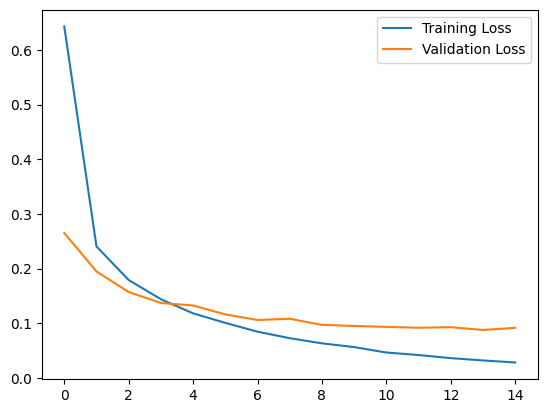

In [ ]:
plt.plot(fit_hist.history['loss'], label='Training Loss')
plt.plot(fit_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

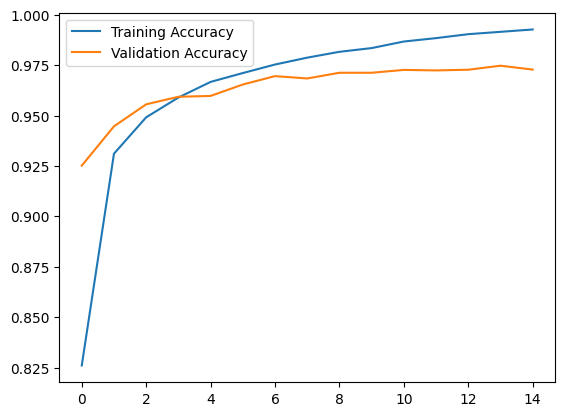

In [ ]:
plt.plot(fit_hist.history['accuracy'], label='Training Accuracy')
plt.plot(fit_hist.history['val_accuracy'], label='Validation Accuracy')
# 과적합(Overfitting)으로 인해 acc와 val_acc의 차이가 더 이상 좁혀지지 않음
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
print('Final test set accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0919
Final test set accuracy 0.9754999876022339
